## Introduction

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Importing dependecies

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df=pd.read_csv(r'C:\Users\user\Documents\Project datasets\creditcard.csv')

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


##### Checking for missing values

In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

##### Checking class distribution

In [5]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

0- Normal transaction


1-Fraudulent transaction

In [17]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [19]:
legal_trans

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
labels=df['Class'].unique()

legal_trans=df[df['Class']==0]
fraud_trans=df[df['Class']==1]

heights=[len(legal_trans['Class']),len(fraud_trans['Class'])]

plt.bar(labels,heights,color='grey')
plt.xticks(labels,[legal_trans,fraud_trans])
plt.ylabel('# of obeservations')
plt.title(" Distribution of credict class transactions")

plt.show()


In [22]:
legal_trans=df[df['Class']==0]
fraud_trans=df[df['Class']==1]

In [23]:
fraud_trans.shape

(492, 31)

In [24]:
legal_trans.shape

(284315, 31)

### Exploring the classes

In [26]:
fraud_trans['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

25% of fraudulent trasactions fall under $1,50% under $9 ..... and the average transaction amount is $122 and the max transaction is 2k

In [27]:
legal_trans['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

 25% of legal trasactions fall under $5,50% under $22 ..... and thw average trasaction is $88 and max transction is 25k

In [30]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### Dealing with class imbalance

Via under-sampling

Building a sample from  the dataset with to match the # of observations in legit transactions

In [32]:
from sklearn.utils import resample

In [34]:
# Downsample the legitimate transactions
legit_downsampled = resample(
    legal_trans, 
    replace=False,              # Sample without replacement
    n_samples=len(fraud_trans), # Match the number of fraud transactions
    random_state=27             # Set random state for reproducibility
)

# Combine the downsampled legitimate transactions with fraud transactions
downsampled_df = pd.concat([fraud_trans, legit_downsampled])


In [36]:
downsampled_df = downsampled_df.sample(frac=1, random_state=27).reset_index(drop=True)


In [37]:
downsampled_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,59431.0,-1.557537,1.126746,-0.162840,-0.512473,0.842401,3.975269,-1.729796,2.085803,-0.255757,...,0.401167,0.727271,-0.118187,1.064186,-0.455601,0.496810,-0.743302,-0.301707,14.59,0
1,41147.0,-5.314173,4.145944,-8.532522,8.344392,-5.718008,-3.043536,-10.989185,3.404129,-6.167234,...,2.331466,0.862996,-0.614453,0.523648,-0.712593,0.324638,2.245091,0.497321,88.23,1
2,40276.0,1.159373,2.844795,-4.050680,4.777701,2.948980,-2.010361,1.744086,-0.410287,-2.450198,...,-0.176541,-0.433470,-0.529323,-0.597020,1.335954,0.547092,0.009979,0.160769,1.00,1
3,132506.0,-1.092468,2.354291,-2.435501,-0.005151,0.312453,-0.723043,-1.004165,-1.795737,-0.621107,...,-0.972910,1.091878,0.082379,-0.669555,-0.375776,-0.152298,-0.045016,0.096314,1.00,0
4,62080.0,-1.599457,2.607720,-2.987193,3.064156,-2.497914,-0.541103,-2.277786,1.268166,-1.997331,...,0.662933,0.184087,-0.089452,-0.506000,-0.062259,-0.052714,0.322854,0.135268,180.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,90955.0,-0.271277,0.939079,-0.410247,-1.156852,2.199308,1.137433,0.879011,0.136487,1.238406,...,-0.310318,-0.281028,0.192319,-0.891771,-1.464805,-0.089347,0.164354,0.082841,1.79,0
980,73407.0,1.208942,0.146918,-0.003416,1.023890,0.152650,0.050871,-0.001984,0.040932,0.184433,...,0.044307,0.123847,-0.190337,-0.788217,0.672207,-0.197704,0.023464,0.011610,25.00,0
981,63585.0,1.249358,0.252036,-0.057463,0.807287,0.179706,-0.151205,0.088375,-0.017923,-0.179656,...,0.023358,0.055265,-0.221163,-0.529489,0.761896,-0.292039,0.005856,0.002014,11.00,0
982,157410.0,-0.213966,0.990962,-1.084647,-0.310215,0.605261,-0.583219,0.340479,0.399642,-0.019719,...,0.149371,0.452360,-0.146499,-0.639486,-0.458031,0.511308,-0.202088,-0.015042,10.55,0


In [38]:
downsampled_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [39]:
downsampled_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94767.245935,0.018306,-0.008688,-0.088113,-0.016753,-0.052891,0.015170,0.008107,0.031248,-0.003152,...,-0.049915,-0.024911,0.024749,-0.005439,0.026979,0.009954,0.004736,-0.017558,-0.027078,92.385508
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


###  splittig the data into features and target

In [41]:
x=downsampled_df.drop('Class',axis=1)
y=downsampled_df.Class

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

## Model training

In [45]:
model=LinearRegression()


In [46]:
model.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

Evaluation for training data

In [52]:
y_predt = (model.predict(x_train) >= 0.5).astype(int)
accuracy = accuracy_score(y_train, y_predt)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.9263024142312579


In [54]:
accuracy = accuracy_score(y_train, y_predt)
print(f"Model accuracy: {accuracy}")

# Generate confusion matrix and classification report
conf_matrixt = confusion_matrix(y_train, y_predt)
class_reportt = classification_report(y_train,y_predt)

class_report11t = classification_report(y_train,y_predt)


print(f"Confusion Matrix:\n{conf_matrixt}\n")
print(f"Classification Report:\n{class_reportt}")

Model accuracy: 0.9263024142312579
Confusion Matrix:
[[390   3]
 [ 55 339]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       393
           1       0.99      0.86      0.92       394

    accuracy                           0.93       787
   macro avg       0.93      0.93      0.93       787
weighted avg       0.93      0.93      0.93       787



~~ The model performs really well on training data

Evaluation for testing data

In [49]:
print(model.predict(x_test)[:5])


[0.6927249  0.32493379 0.07454262 0.96475725 0.08780449]


Model predictions are probablities, for evaluation theses need to be converted back into binary

In [50]:
y_pred = (model.predict(x_test) >= 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")


Model accuracy: 0.8984771573604061


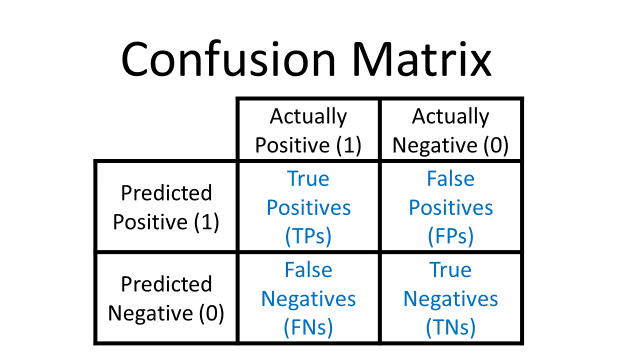

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test,y_pred)

class_report11 = classification_report(y_test,y_pred)


print(f"Confusion Matrix:\n{conf_matrix}\n")
print(f"Classification Report:\n{class_report}")


Model accuracy: 0.8984771573604061
Confusion Matrix:
[[95  4]
 [16 82]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90        99
           1       0.95      0.84      0.89        98

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197



~~~ If accuracy score is signifiacly differnt from training accuracy the the model is overfitting( under fitting vice-versa), our model is slighly lower than the training data so our model performs well 